Visualizing Data

In this notebook we made visualization starting from the CSV file containg the cleaned data


In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Load the cleaned Taxi Data

In [2]:
taxi = pd.read_csv(Path('generated_data/chicago_taxi_small_and_cleaned.csv'))
#With the writing of th CSV Timestamp as been lost so we need to reconvert them
taxi.Trip_Start_Timestamp = pd.to_datetime(taxi.Trip_Start_Timestamp)
taxi.Trip_End_Timestamp = pd.to_datetime(taxi.Trip_End_Timestamp)

We now plot the GeoData on the Chiacago map

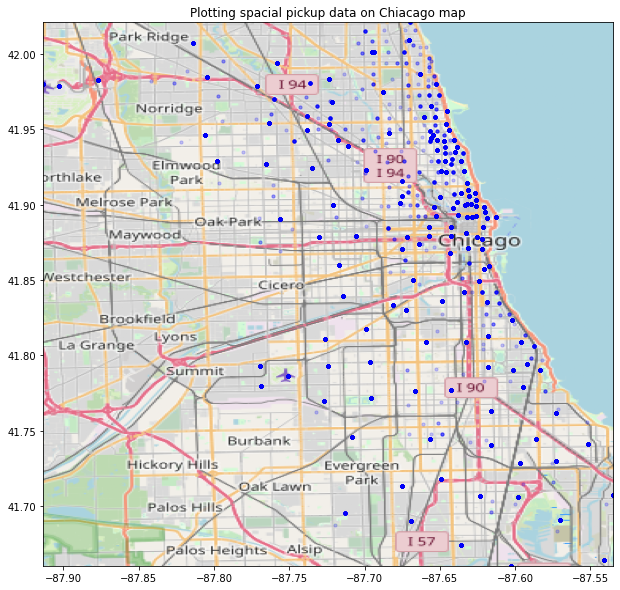

In [3]:
BBox =(taxi.Pickup_Centroid_Longitude.min(), taxi.Pickup_Centroid_Longitude.max(),
             taxi.Pickup_Centroid_Latitude.min(), taxi.Pickup_Centroid_Latitude.max())

mappina = plt.imread(Path("data/chicago.png"))

fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(taxi.Pickup_Centroid_Longitude.values, taxi.Pickup_Centroid_Latitude, zorder =1, alpha =0.2, c ='b', s=10)
ax.set_title('Plotting spacial pickup data on Chiacago map')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.imshow(mappina, zorder = 0, extent = BBox, aspect ='equal')

Now we plot the Dropoff point on the map

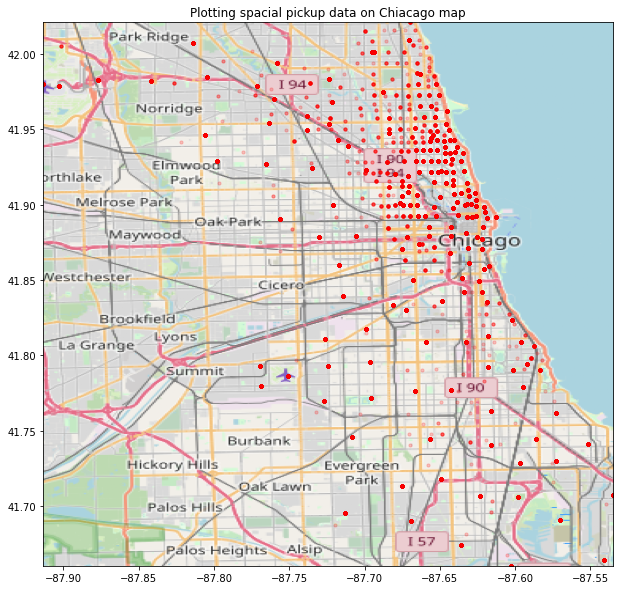

In [4]:
BBox =(taxi.Dropoff_Centroid_Longitude.min(), taxi.Dropoff_Centroid_Longitude.max(),
             taxi.Dropoff_Centroid_Latitude.min(), taxi.Dropoff_Centroid_Latitude.max())

mappina = plt.imread(Path("data/chicago.png"))

fig2, ax = plt.subplots(figsize = (20,10))

ax.scatter(taxi.Dropoff_Centroid_Longitude.values, taxi.Dropoff_Centroid_Latitude, zorder =1, alpha =0.2, c ='r', s=10)
ax.set_title('Plotting spacial pickup data on Chiacago map')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.imshow(mappina, zorder = 0, extent = BBox, aspect ='equal')

We can said  that the Dropoff are more concentrated in the Chiacago's center.
This is reasonable beacuse the point of interes are more concentrated in the center area

print correlation matrix

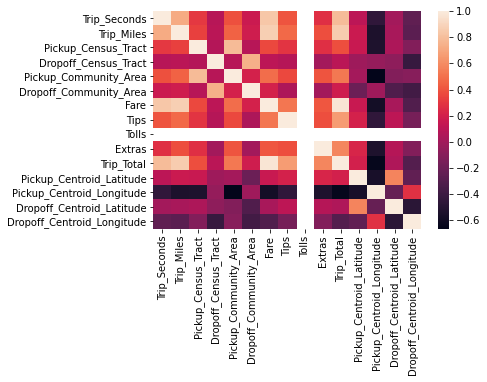

In [5]:
corrMatrix = taxi.corr()
sns.heatmap(corrMatrix)
plt.show()

Now we want to plot the Community Area

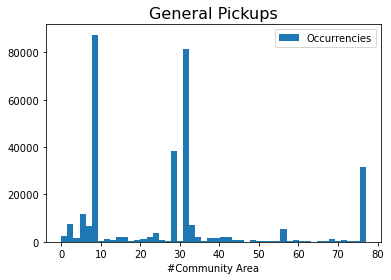

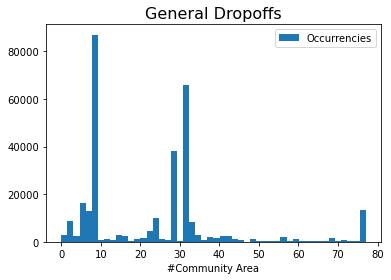

In [6]:
plt.hist(taxi.Pickup_Community_Area, bins = 50, range = (0, 77), label='Occurrencies')
plt.xlabel('#Community Area')
plt.title('General Pickups', fontsize = 16)
plt.legend()
plt.show()

plt.hist(taxi.Dropoff_Community_Area, bins = 50, range = (0, 77), label='Occurrencies')
plt.xlabel('#Community Area')
plt.title('General Dropoffs', fontsize = 16)
plt.legend()
plt.show()

We Want to see the COVID EFFECT on Transportation

In [11]:
#THIS PLOT AN INTERACTIVE histogram but it is so heay the may made slow the notebook (probalby is the PyCharm+Dataset+plot
# that is heavy we should use Ananconda solve this)

covid_effect = px.histogram(taxi, x="Trip_Start_Timestamp", histfunc="count", title="Taxi use divided by month")
covid_effect.update_traces(xbins_size="M1")
covid_effect.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
covid_effect.update_layout(bargap=0.1)
#covid_effect.add_trace(go.Scatter(mode="markers", x=taxi.Trip_Start_Timestamp, name="daily"))
covid_effect.show()

We see that after the spread of the COVID-19 pandemic there are a fall-down of the demands